In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("daily-bike-share.csv")

## Verileri Keşfi
* day: Verilerin gözlemlendiği tarih - bu durumda veriler günlük olarak toplanmıştır; yani tarih başına bir satır var.
* season: Mevsimi gösteren sayısal olarak kodlanmış bir değer (1:ilkbahar, 2:yaz, 3:sonbahar, 4:kış)
* year: Gözlemin yapıldığı çalışmanın yılı (Çalışma iki yıl boyunca gerçekleşti - 0 yılı 2011'i ve 1 yılı 2012'yi temsil ediyor)
* month: Gözlemin yapıldığı takvim ayı (1:Ocak ... 12:Aralık)
* holiday: Gözlemin resmi tatilde yapılıp yapılmadığını gösteren ikili değer)
* weekday: Haftanın gözlemin yapıldığı günü (0:Pazar ... 6:Cumartesi)
* workingday: Günün iş günü olup olmadığını gösteren ikili değer (hafta sonu veya tatil değil)
* weathersit: Hava durumunu gösteren kategorik bir değer (1:açık, 2:sis/bulut, 3:hafif yağmur/kar, 4:şiddetli yağmur/dolu/kar/sis)
* temp: Santigrat cinsinden sıcaklık (normalleştirilmiş)
* atemp: Santigrat cinsinden (normalize edilmiş) görünen ("hissedilen") sıcaklık
* hum: Santigrat cinsinden (normalize edilmiş) görünen ("hissedilen") sıcaklık: Nem seviyesi (normalleştirilmiş)
* windspeed: Rüzgar hızı (normalleştirilmiş)
* rentals: Kaydedilen bisiklet kiralama sayısı.

Bu veri kümesinde, kiralama, modelimizin tahmin etmek için eğitilmesi gereken etiketi (y değeri) temsil eder. Diğer sütunlar potansiyel özelliklerdir (x değerleri).

In [3]:
df.head()

,day,mnth,year,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(731, 13)
##################### Types #####################
day             int64
mnth            int64
year            int64
season          int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
rentals         int64
dtype: object
##################### Head #####################
   day  mnth  year  season  holiday  weekday  workingday  weathersit  \
0    1     1  2011       1        0        6           0           2   
1    2     1  2011       1        0        0           0           2   
2    3     1  2011       1        0        1           1           1   
3    4     1  2011       1        0        2           1           1   
4    5     1  2011       1        0        3           1           1   

       temp     atemp       hum  windspeed  rentals  
0  0.344167  0.363625  0.805833   0.160446      331  


In [5]:
numeric_col = ["temp", "atemp", "hum", "windspeed"]
df[numeric_col + ["rentals"]].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


* Ortalama günlük kiralama sayısının 848 civarında olduğunu görüyoruz; ancak nispeten büyük bir standart sapma var ve bu da günlük kiralama sayısında çok fazla değişkenlik olduğunu gösteriyor. Daha iyi anlamak için kiralama verilerini görselleştirmemiz gerekir.

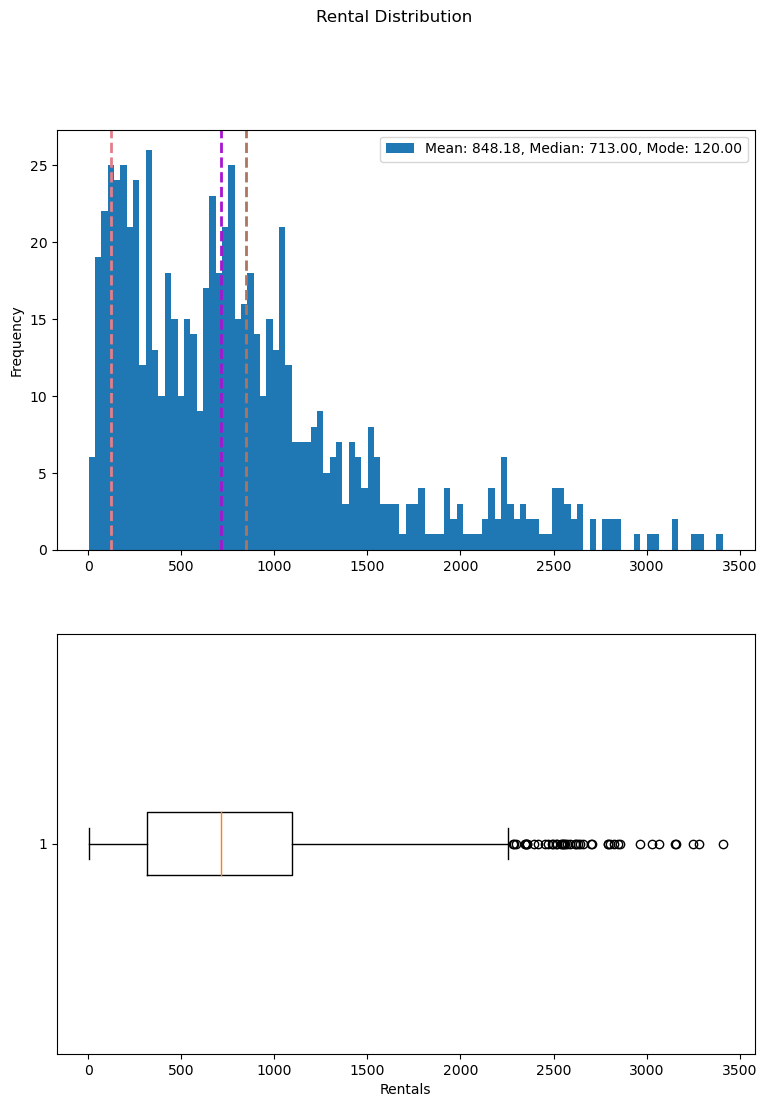

In [6]:
label = df["rentals"]

fig, ax = plt.subplots(2, 1, figsize=(9,12))

legend = "Mean: " + format(label.mean(), ".2f") \
        + ", Median: " + format(label.median(), ".2f") \
        + ", Mode: " + format(label.mode()[0], ".2f")

        
ax[0].hist(label, bins=100, label=legend)
ax[0].set_ylabel("Frequency")
ax[0].legend()

# Bu kod parçacığı, bir grafik üzerinde etiket dizisinin ortalama, ortanca ve 
# mod değerlerini göstermek için dikey çizgiler eklemektedir. 

mode_value = label.value_counts().idxmax()
ax[0].axvline(label.mean(), color="#ad755d", linestyle="dashed", linewidth=2)
ax[0].axvline(label.median(), color="#a814d0", linestyle="dashed", linewidth=2)
ax[0].axvline(mode_value, color="#e37f8a", linestyle="dashed", linewidth=2)

ax[1].boxplot(label, vert=False)
ax[1].set_xlabel("Rentals")

fig.suptitle("Rental Distribution")

fig.show()

* Grafikler, günlük kiralama sayısının 0 ile 3.400'ün biraz üzerinde olduğunu gösteriyor. Ancak, günlük kiralamaların ortalama ve medyan sayısı bu aralığın alt sınırına yakındır ve verilerin çoğu 0 ile yaklaşık 2.200 kiralama arasındadır. Bunun üzerindeki birkaç değer, kutu çiziminde küçük daireler olarak gösterilir ve bunların aykırı değerler olduğunu gösterir - başka bir deyişle, verilerin çoğunun tipik aralığının ötesinde alışılmadık derecede yüksek veya düşük değerler.

* Sayısal özelliklerin aynı tür görsel keşfini yapabiliriz. Bunların her biri için bir histogram oluşturalım.

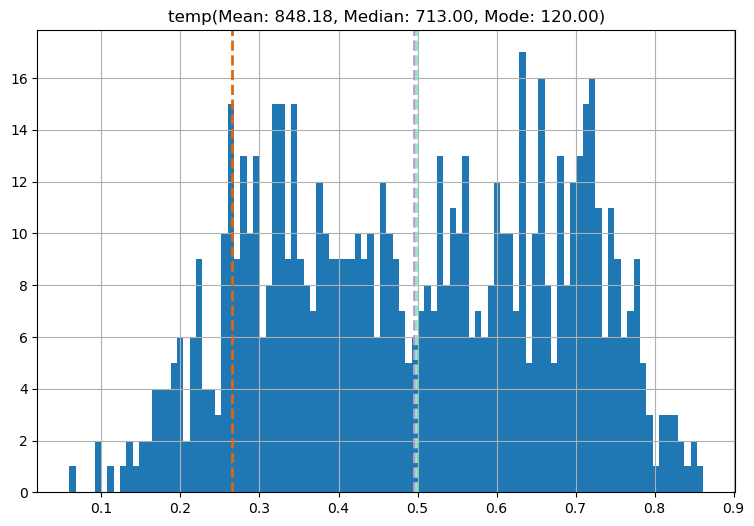

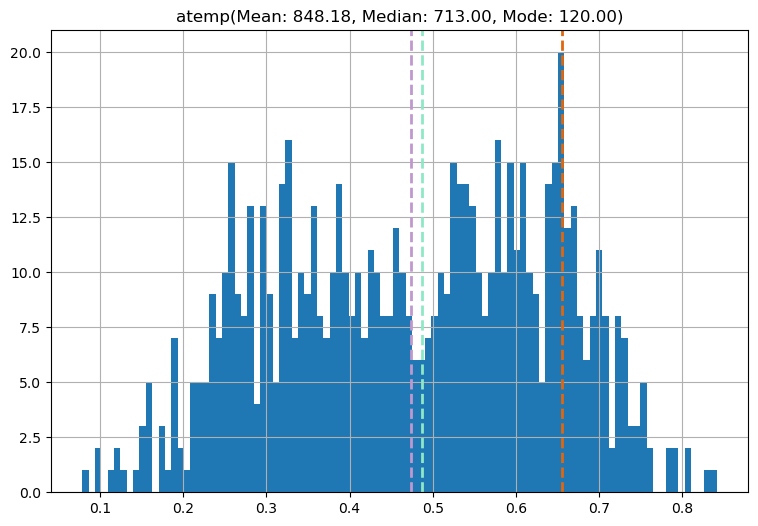

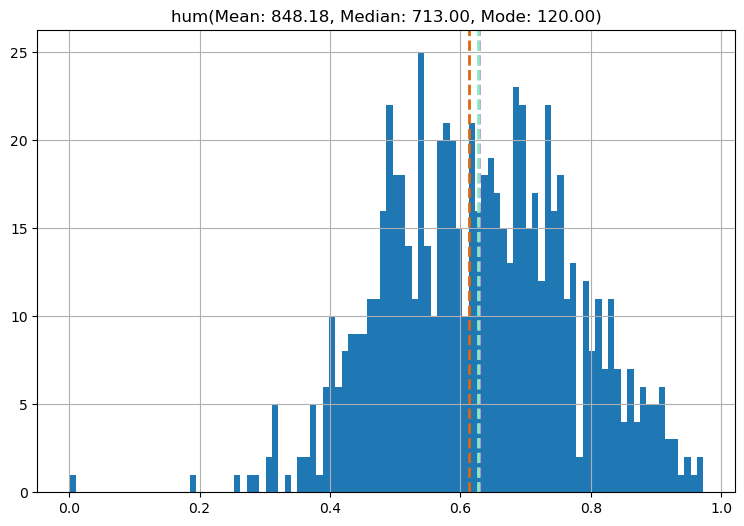

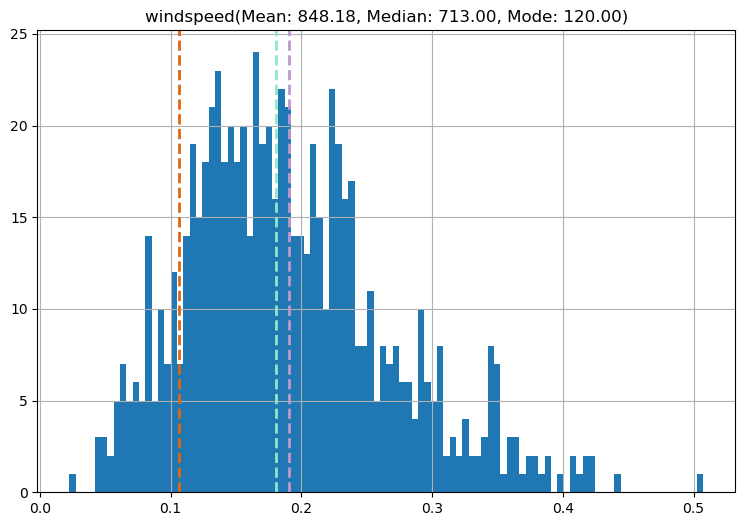

In [7]:
for col in numeric_col:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca() # matplotlib kütüphanesindeki bir grafik nesnesi olan "Geçerli Eksenleri Al" anlamına gelir (Get Current Axes)
    feature = df[col]
    feature.hist(bins=100, ax=ax)
    
    ax.axvline(feature.mean(), color = "#bf98cd", linestyle="dashed", linewidth=2)
    ax.axvline(feature.median(), color = "#8ee8c6", linestyle="dashed", linewidth=2)
    ax.axvline(feature.mode()[0], color = "#e0670d", linestyle="dashed", linewidth=2)
    
    title = "Mean: " + format(label.mean(), ".2f") \
            + ", Median: " + format(label.median(), ".2f") \
            + ", Mode: " + format(label.mode()[0], ".2f")
    
    ax.set_title(col + "(" + title + ")")
plt.show()    

* Sayısal özellikler, ortalama ve medyan değer aralığının ortasına daha yakın olacak şekilde daha normal dağılmış gibi görünmektedir ve en sık meydana gelen değerlerin olduğu yerlerle çakışmaktadır.

* Veri kümesindeki sayısal değerlerin dağılımını inceledik, peki ya kategorik özellikler? Bunlar bir ölçekte sürekli sayılar değildir, dolayısıyla histogram kullanamayız; ancak her kategori için her ayrık değerin sayısını gösteren bir çubuk grafik çizebiliriz.

In [8]:
categoricak_col = ["season", "mnth", "holiday", "weekday", "workingday", "weathersit", "day"]

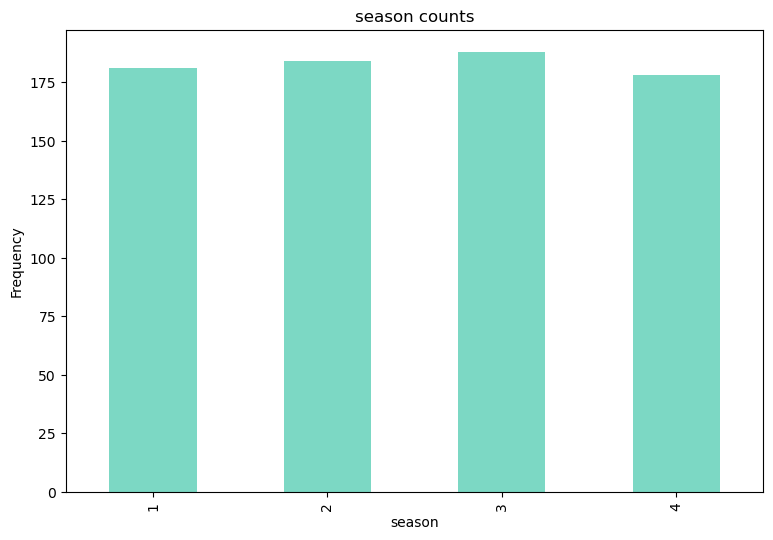

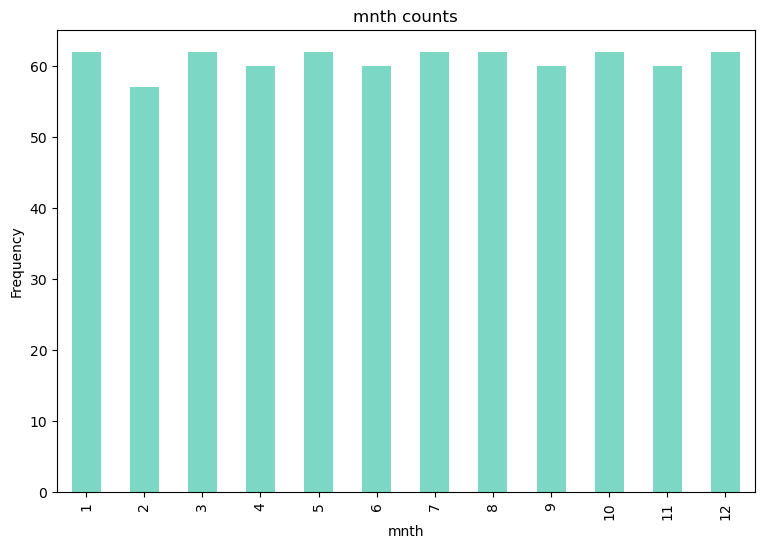

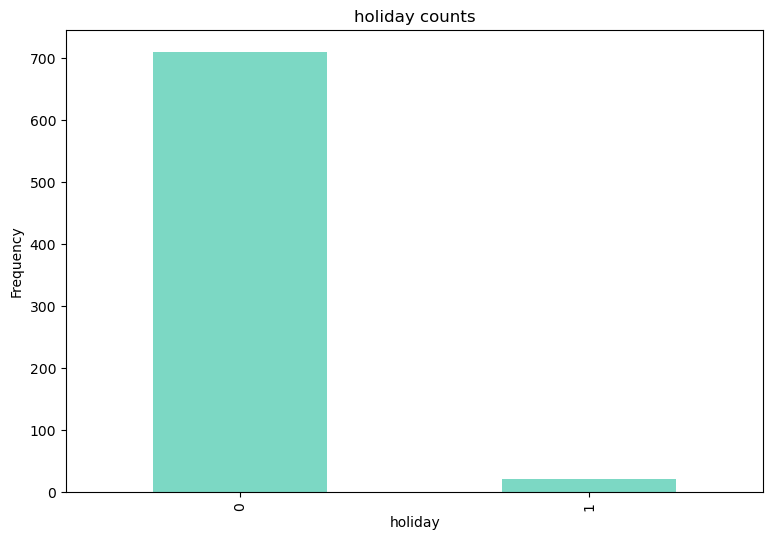

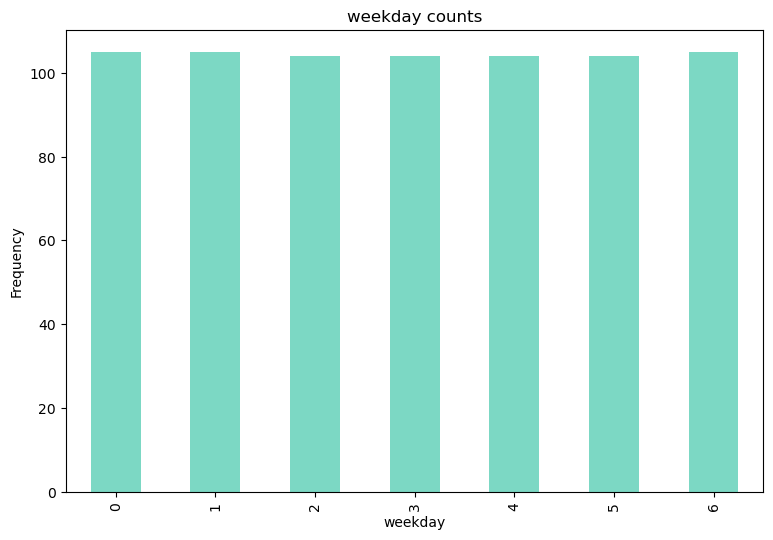

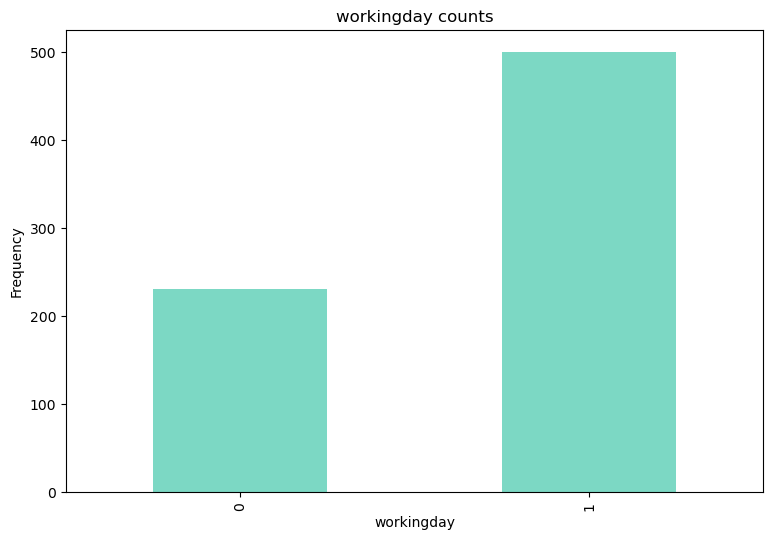

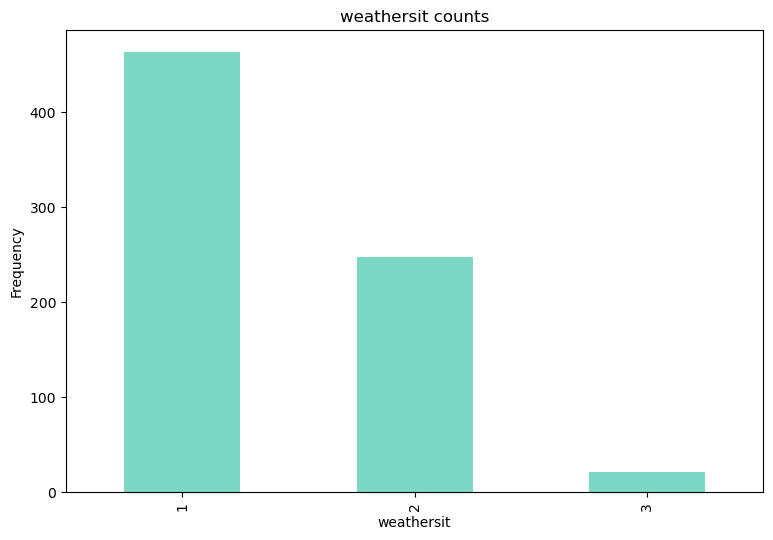

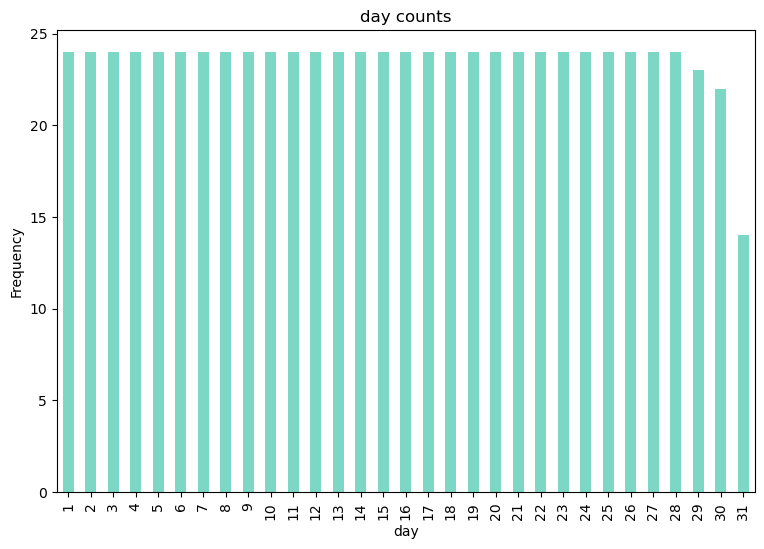

In [9]:
for col in categoricak_col:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    counts.plot.bar(ax=ax, color="#7cd8c4")
    ax.set_title(col + " counts")
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

* Kategorik özelliklerin çoğu aşağı yukarı tek biçimli bir dağılım gösterir (yani her kategori için aşağı yukarı aynı sayıda satır vardır). Bunun istisnaları şunları içerir:
    * holiday: Tatil olmayan günlere göre tatil olan çok daha az gün vardır.
    * workingday: Çalışılmayan günlerden daha fazla iş günü vardır.
    * weathersit: Çoğu gün kategori 1'dir (açık), ikinci en yaygın gün kategori 2'dir (sis ve bulut). Nispeten az sayıda kategori 3 (hafif yağmur veya kar) günü vardır ve hiç kategori 4 (şiddetli yağmur, dolu veya sis) günü yoktur.
    
* Artık sütunlarımızdaki verilerin dağılımı hakkında bir şeyler bildiğimize göre, özellikler ile tahmin edebilmek istediğimiz kiralama etiketi arasındaki ilişkileri aramaya başlayabiliriz.

* Sayısal özellikler için, özellik ve etiket değerlerinin kesişimini gösteren dağılım grafikleri oluşturabiliriz. Görünen ilişkiyi ölçmek için korelasyon istatistiğini de hesaplayabiliriz.

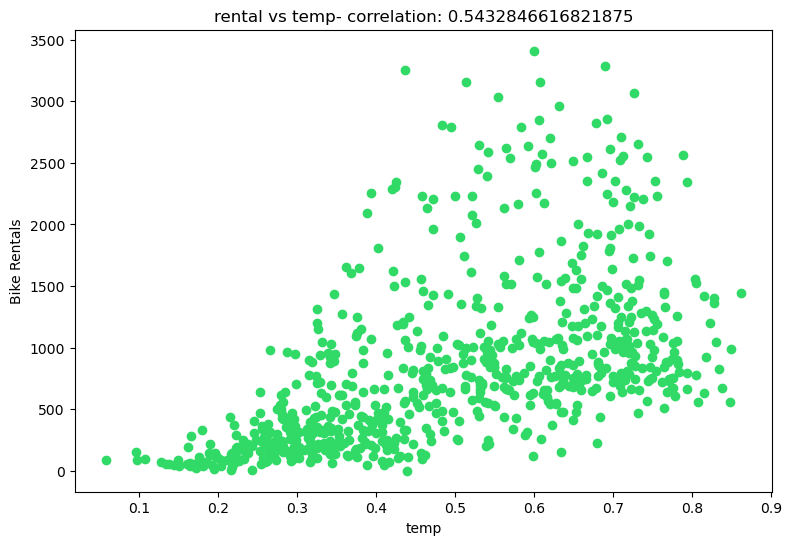

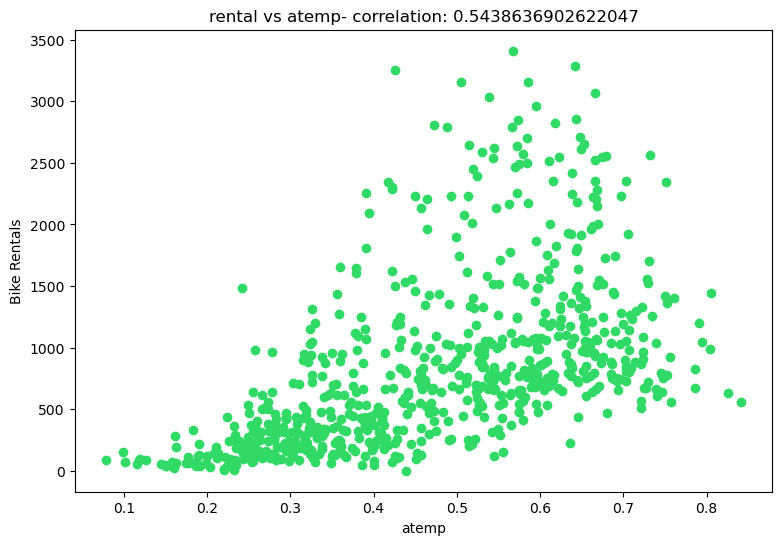

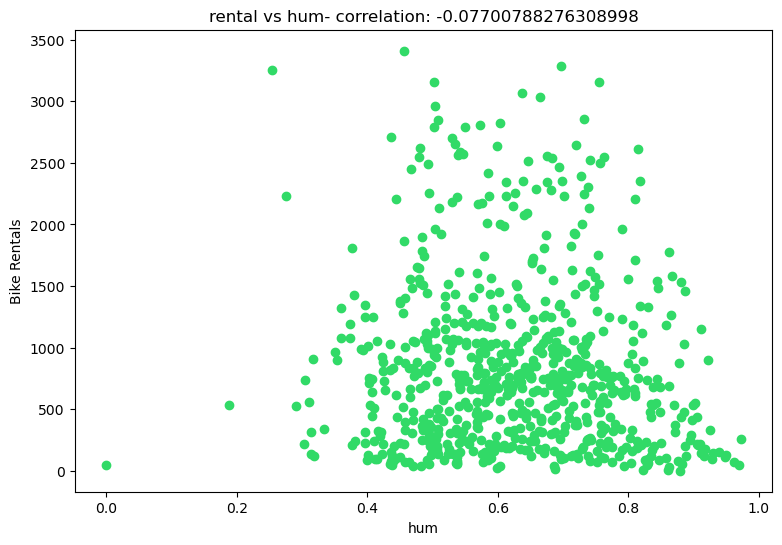

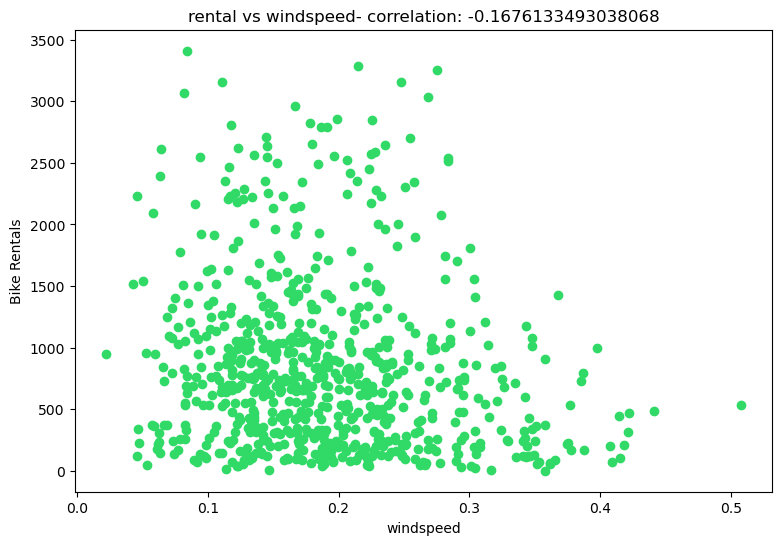

In [10]:
for col in numeric_col:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca() 
    feature = df[col]
    label = df["rentals"]
    correlation = feature.corr(label)
    plt.scatter(x = feature, y = label, color= "#31da67")
    plt.xlabel(col)
    plt.ylabel('Bike Rentals')
    ax.set_title("rental vs " + col + "- correlation: " + str(correlation))
plt.show()

* Sonuçlar kesin değildir, ancak sıcaklık ve sıcaklık dağılım grafiklerine yakından bakarsanız, daha yüksek kiralama sayımlarının daha yüksek sıcaklıklarla çakışma eğiliminde olduğunu gösteren belirsiz bir diyagonal eğilim görebilirsiniz; ve bu özelliklerin her ikisi için de 0,5'in biraz üzerinde bir korelasyon değeri bu gözlemi desteklemektedir. Tersine, uğultu ve rüzgar hızı grafikleri, biraz negatif bir korelasyon göstererek, yüksek nem veya rüzgar hızı olan günlerde daha az kiralama olduğunu gösterir.

* Şimdi kategorik özellikleri etiketle karşılaştıralım. Bunu, her kategori için kiralama sayılarının dağılımını gösteren kutu grafikleri oluşturarak yapacağız.

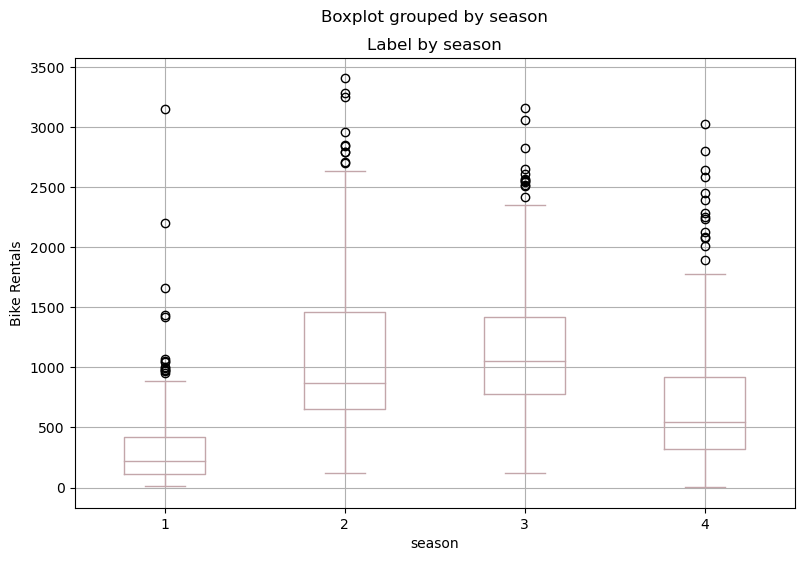

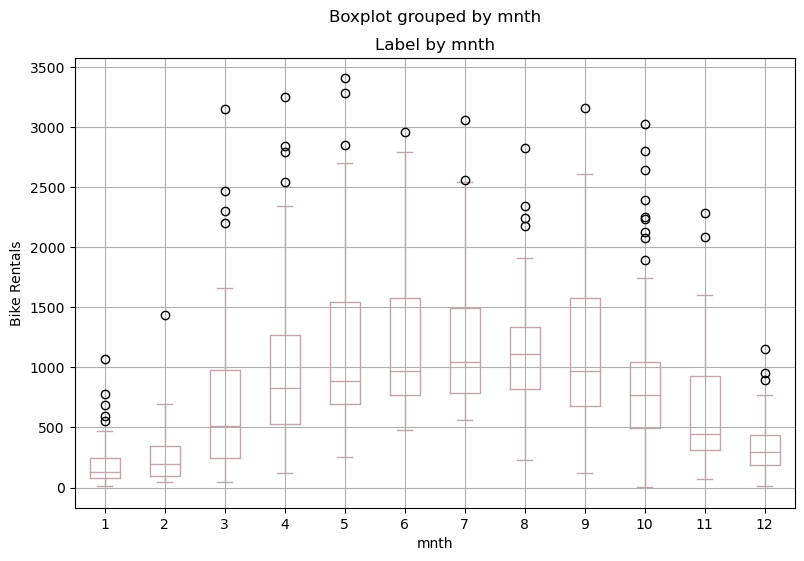

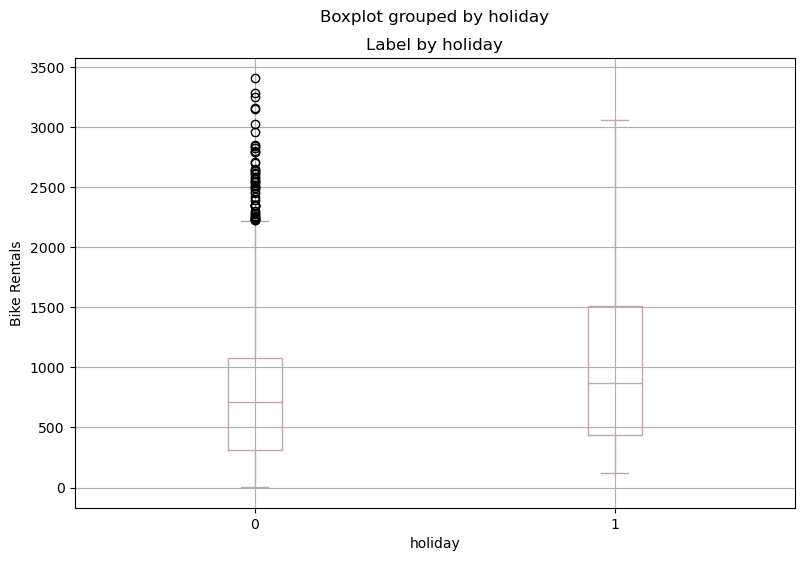

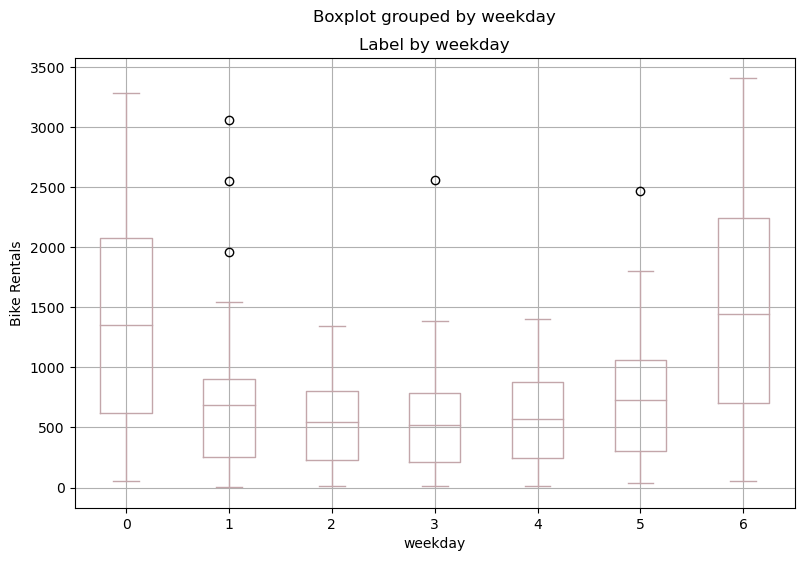

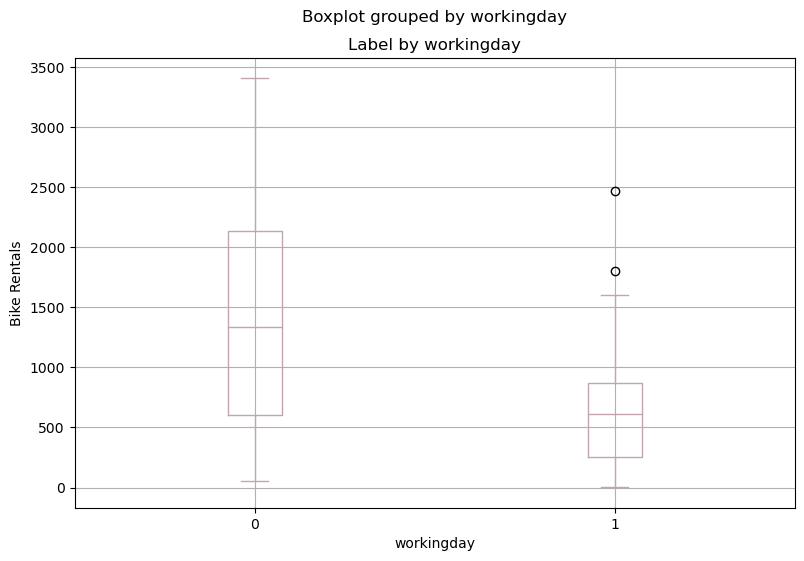

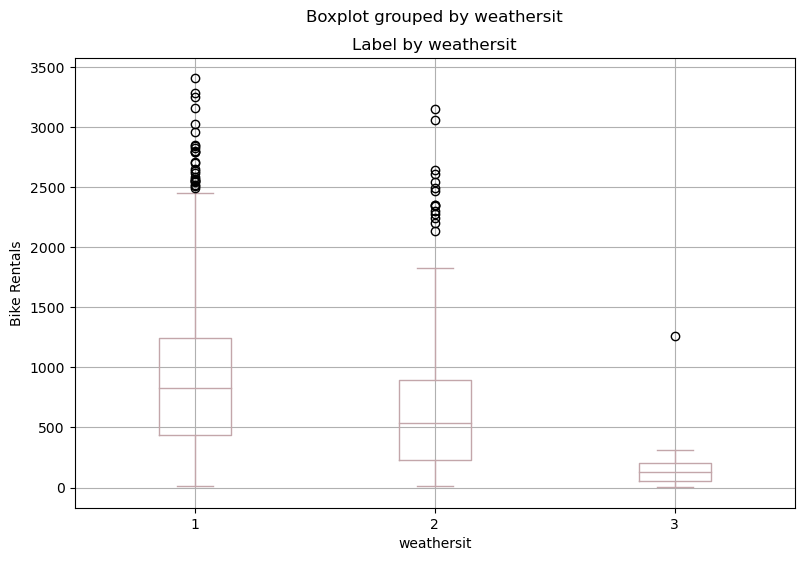

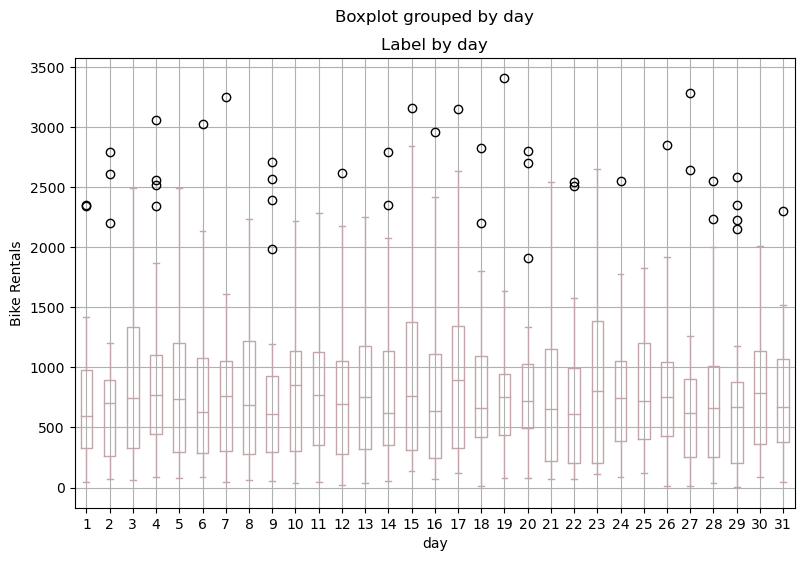

In [11]:
for col in categoricak_col:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    df.boxplot(ax=ax, color="#c3a6aa", column = "rentals", by = col)
    ax.set_title("Label by " + col)
    ax.set_ylabel("Bike Rentals")
plt.show()

* Grafikler, bazı kategori değerleri ve kiralamalar arasındaki ilişkide bazı farklılıklar göstermektedir. Örneğin, hafta sonları (0 veya 6) ile çalışma haftası (hafta içi 1 ila 5) arasındaki kiralamaların dağılımında açık bir fark vardır. Benzer şekilde tatil ve iş günü kategorilerinde de önemli farklılıklar bulunmaktadır. Yaz ve sonbahar aylarında ilkbahar ve kış aylarına göre farklı kira dağılımları gösteren dikkat çekici bir trend var. Hava durumu kategorisi de kira dağılımında fark yaratacak gibi görünüyor. Ayın günü için oluşturduğumuz gün özelliği, çok az değişiklik gösteriyor, bu da muhtemelen kiralama sayısını tahmin etmediğini gösteriyor.

## Regresyon Modeli Eğitimi
* Artık verileri incelediğimize göre, kiralama etiketini tahmin etmek için potansiyel olarak öngörücü olarak tanımladığımız özellikleri kullanan bir regresyon modeli eğitmek için kullanma zamanı. Yapmamız gereken ilk şey, modeli eğitmek için kullanmak istediğimiz özellikleri, tahmin etmesini istediğimiz etiketten ayırmak.

In [12]:
X = df[["season", "mnth", "holiday", "weekday", "workingday", "temp", "atemp", "hum", "windspeed"]].values
y = df["rentals"].values

* Veri kümesini ayırdıktan sonra, artık özellikleri içeren X ve etiketleri içeren y adlı numpy dizilerimiz var. Verileri rastgele bölmek için scikit-learn kitaplığında train_test_split işlevini kullanacağız. Bu kitaplık, Python için en yaygın kullanılan makine öğrenimi paketlerinden biridir.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 0)

* X değerleri ile y etiketi arasında doğrusal bir ilişki bulmaya çalışarak çalışan, gerileme için ortak bir başlangıç ​​noktası olan doğrusal bir gerileme algoritmasını kullanacağız. Ortaya çıkan model, her olası X ve y değer kombinasyonunun kesiştiği bir çizgiyi kavramsal olarak tanımlayan bir fonksiyondur.

* Scikit-Learn'de, eğitim algoritmaları tahmin edicilerde kapsüllenir ve bu durumda, doğrusal bir regresyon modeli eğitmek için LinearRegression tahmincisi kullanacağız.

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Eğitilen Modeli Değerlendirme
* Artık modeli eğittiğimize göre, doğrulama veri kümemizde (X_test) geride tuttuğumuz özelliklerin kiralama sayılarını tahmin etmek için kullanabiliriz. Ardından, modelin ne kadar iyi çalıştığını (veya çalışmadığını!) değerlendirmek için bu tahminleri gerçek etiket değerleriyle karşılaştırabiliriz.

In [17]:
predictions = lr.predict(X_test)
np.set_printoptions(suppress=True) #  tahmin sonuçlarının yazdırılmasında ondalık kısmın gösterilmemesini sağlar.

* Her tahminin karşılık gelen "temel gerçek" gerçek değeriyle karşılaştırılması, modelin ne kadar iyi tahmin ettiğini belirlemenin çok etkili bir yolu değildir. Tahminleri gerçek etiketlerle karşılaştıran bir dağılım grafiğini görselleştirerek daha iyi bir gösterge elde edip edemeyeceğimize bakalım. Tahmin edilen etiketlerin gerçek etiketlerle ne kadar iyi hizalandığı konusunda genel bir fikir edinmek için bir trend çizgisini de üst üste bindireceğiz.

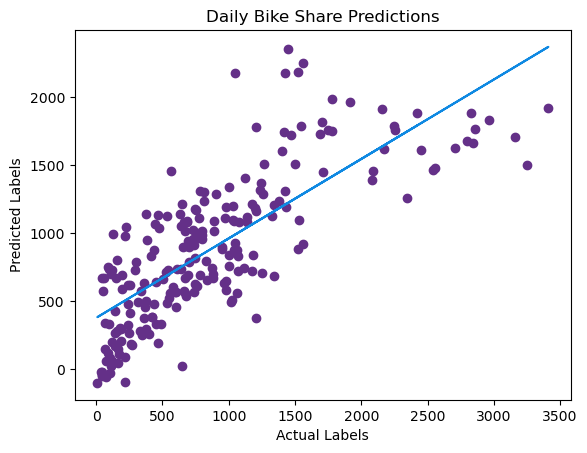

In [18]:
plt.scatter(y_test, predictions, color = "#643088")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(y_test, predictions, 1)
# y_test ve predictions arasında bir dereceli (lineer) polinomu en küçük kareler yöntemiyle uydurur 
# ve polinomun katsayılarını hesaplar. Burada, 1 ikinci parametre, polinomun derecesini belirtir ve 
# bu durumda derecesi 1 olan bir lineer polinom uydurulacaktır.
p = np.poly1d(z)
# Uydurulan lineer polinomu kullanarak, polinom fonksiyonunu p olarak tanımlar. 
# Bu fonksiyon, tahmin edilen değerleri verilerek gerçek değerler için tahminler yapmamıza olanak sağlar.
plt.plot(y_test, p(y_test), color = "#0f89e2")
plt.show()

* Kesin bir diyagonal eğilim vardır ve tahmin edilen ve gerçek değerlerin kesişim noktaları genellikle eğilim çizgisinin yolunu takip eder; ancak doğru ile temsil edilen ideal fonksiyon ile sonuçlar arasında oldukça fazla fark vardır. Bu varyans, modelin artıklarını temsil eder - başka bir deyişle, model eğitim sırasında öğrendiği katsayıları doğrulama verilerine uyguladığında tahmin edilen etiket ile doğrulama etiketinin gerçek değeri arasındaki farkı temsil eder. Doğrulama verilerinden değerlendirildiğinde bu artıklar, model etiketi bilinmeyen yeni verilerle kullanıldığında beklenen hata seviyesini gösterir.

* Artıkları, yaygın olarak kullanılan bir dizi değerlendirme ölçütünü hesaplayarak ölçebilirsiniz. Aşağıdaki üçe odaklanacağız:

    * **Ortalama Kare Hata (MSE):** Öngörülen ve gerçek değerler arasındaki farkların karelerinin ortalaması. Bu, değer ne kadar küçük olursa modelin o kadar iyi uyum sağladığı göreli bir metrik verir.
    * **Kök Ortalama Kare Hata (RMSE):** MSE'nin karekökü. Bu, etiketle aynı birimde mutlak bir ölçüm sağlar (bu durumda, kiralama sayısı). Değer ne kadar küçükse, model o kadar iyidir (basit bir anlamda, tahminlerin yanlış olduğu ortalama kiralama sayısını temsil eder!)
    * **Belirleme Katsayısı (genellikle R-kare veya R2 olarak bilinir:** Değer ne kadar yüksek olursa modelin o kadar iyi uyum sağladığı göreli bir metrik. Esasen bu metrik, modelin tahmin edilen ve gerçek etiket değerleri arasındaki varyansın ne kadarını temsil eder? i anlatabilmektir.

* Doğrulama verileri için oluşturduğu tahminlere dayalı olarak modelimiz için bu ölçümleri hesaplamak üzere Scikit-Learn'ü kullanalım.

In [19]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
mse = mean_squared_error(y_test, predictions)
mse

204966.6172001891

In [21]:
rmse = np.sqrt(mse)
rmse

452.7323902706643

In [22]:
r2 = r2_score(y_test, predictions)
r2

0.5981758114305507

* Yukarıdaki ölçümlerden de görebileceğiniz gibi, daha iyisini yapmak için çok fazla alan var!

### Algoritmalarla Deney Yapma
* Modeli eğitmek için kullandığımız doğrusal regresyon algoritmasının bir miktar tahmin yeteneği vardır, ancak deneyebileceğimiz birçok türde regresyon algoritması vardır, örneğin:

* **Doğrusal algoritmalar:** Yalnızca yukarıda kullandığımız Doğrusal Regresyon algoritması değil (teknik olarak Sıradan En Küçük Kareler algoritmasıdır), Lasso ve Ridge gibi diğer değişkenler.
* **Ağaç tabanlı algoritmalar:** Bir tahmine ulaşmak için bir karar ağacı oluşturan algoritmalar.
* **Topluluk algoritmaları:** Genelleştirilebilirliği geliştirmek için çoklu tabanlı algoritmaların çıktılarını birleştiren algoritmalar.
##### Başka Bir Doğrusal Algoritmayı Deneme
* Bir Lasso algoritması kullanarak regresyon modelimizi eğitmeyi deneyelim. Bunu sadece eğitim kodundaki tahmin ediciyi değiştirerek yapabiliriz.

In [23]:
from sklearn.linear_model import Lasso

In [24]:
ls = Lasso()
ls.fit(X_train, y_train)

Lasso()

In [25]:
predictions = ls.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, predictions)
mse

205264.95665313886

In [27]:
rmse = np.sqrt(mse)
rmse

453.06175810052525

In [28]:
r2 = r2_score(y_test, predictions)
r2

0.5975909356579134

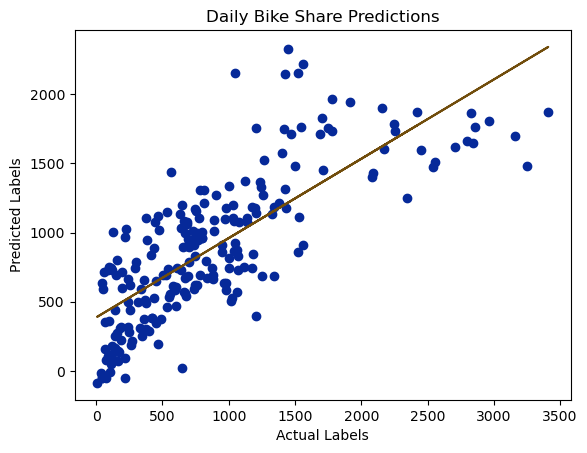

In [29]:
plt.scatter(y_test, predictions, color = "#062999")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = "#714d0c")
plt.show()

##### Karar Ağacı Algoritması 
* Doğrusal bir modele alternatif olarak, veri kümesindeki özelliklerin bir dizi değerlendirmede incelendiği ve her birinin karar ağacı tabanlı bir dalda sonuçlandığı ağaç tabanlı bir yaklaşım kullanan makine öğrenimi için bir algoritma kategorisi vardır. Her dal dizisinin sonunda, özellik değerlerine dayalı olarak tahmin edilen etiket değerine sahip yaprak düğümler bulunur.

* Bunun nasıl çalıştığını bir örnekle görmek en kolayı. Bisiklet kiralama verilerini kullanarak bir Karar Ağacı regresyon modeli eğitelim. Modeli eğittikten sonra, aşağıdaki kod, model tanımını ve etiket değerlerini tahmin etmek için kullandığı ağacın metin temsilini yazdıracaktır.

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

In [31]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
# Model ağacını görselleştirelim
tree = export_text(dtr)
print(tree)

|--- feature_5 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_6 <= 0.32
|   |   |   |--- feature_7 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_5 <= 0.29
|   |   |   |   |   |   |--- feature_1 <= 1.50
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |   |--- feature_1 >  1.50
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |--- feature_5 >  0.29
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.28
|   |   |   |   |   |   |--- feature_5 <= 0.28
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_5 >  0.28
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_8 >  0.28
|   |   |   |   |   |   |--- feature_8 <= 0.36
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_8 >  0.36
|   |   |   |   |   |   |   |--- value: [532.00]
|   |   |   |

* Artık ağaç tabanlı bir modelimiz var; ama iyi mi? Test verileri ile değerlendirelim.

In [33]:
predictions = dtr.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, predictions)
mse

227103.72727272726

In [35]:
rmse = np.sqrt(mse)
rmse

476.55401296466624

In [36]:
r2 = r2_score(y_test, predictions)
r2

0.5547773965390059

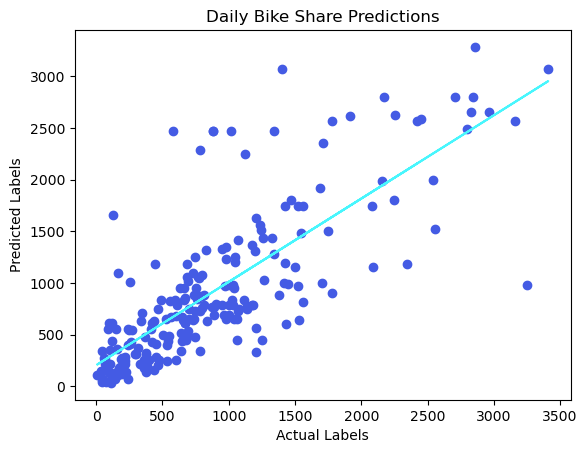

In [37]:
plt.scatter(y_test, predictions, color = "#445be4")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = "#48f6fd")
plt.show()

* Ağaç tabanlı model, doğrusal modele göre gelişmemiş gibi görünüyor, başka ne deneyebiliriz?

##### Topluluk Algoritması
* Topluluk algoritmaları, ya bir temel modeller koleksiyonuna bir toplama işlevi uygulayarak (bazen bir torbalama olarak anılır) ya da tahmin performansını iyileştirmek için birbiri üzerine inşa edilen bir dizi model oluşturarak (artırma olarak adlandırılır) optimum bir model üretmek için birden çok temel tahmin ediciyi birleştirerek çalışır.

* Örneğin, daha iyi bir genel model için birden çok Karar Ağacı modeline bir ortalama alma işlevi uygulayan bir Rastgele Orman modelini deneyelim.

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
predictions = rfr.predict(X_test)

In [41]:
mse = mean_squared_error(y_test, predictions)
mse

114267.95823636363

In [42]:
rmse = np.sqrt(mse)
rmse

338.0354393201453

In [43]:
r2 = r2_score(y_test, predictions)
r2

0.7759848397509086

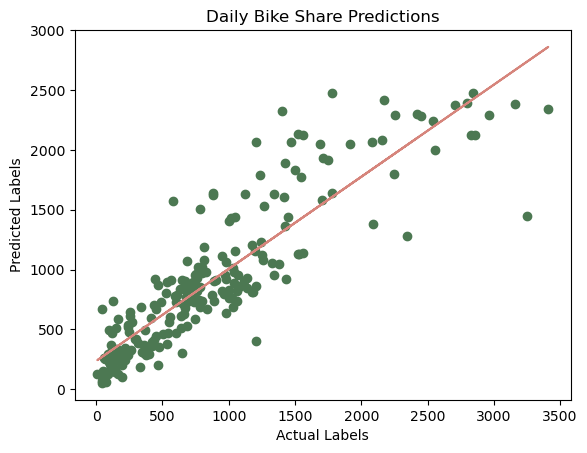

In [45]:
plt.scatter(y_test, predictions, color = "#4c7852")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = "#d6857c")
plt.show()

* İyi bir önlem için, bir hızlandırıcı topluluk algoritması da deneyelim. Bir Rastgele Orman algoritması gibi birden fazla ağaç oluşturan bir Gradient Boosting tahmincisi kullanacağız, ancak hepsini bağımsız olarak oluşturmak ve ortalama sonucu almak yerine, modeldeki kaybı (hata) kademeli olarak azaltmak amacıyla her ağaç bir öncekinin çıktıları üzerine inşa ediliyor.

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [48]:
predictions = gbr.predict(X_test)

In [49]:
mse = mean_squared_error(y_test, predictions)
mse

105265.4223253122

In [50]:
rmse = np.sqrt(mse)
rmse

324.44633196464434

In [51]:
r2 = r2_score(y_test, predictions)
r2

0.7936337463725778

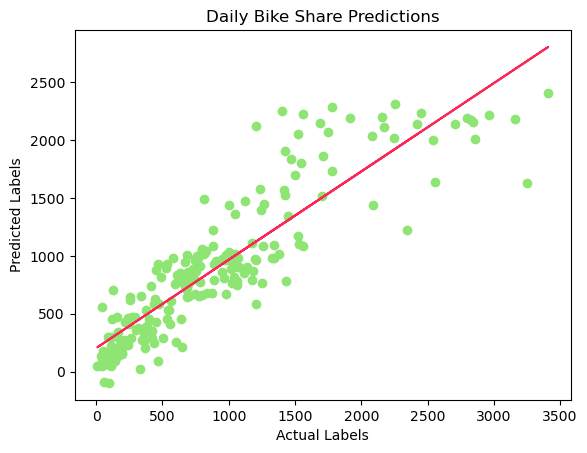

In [52]:
plt.scatter(y_test, predictions, color = "#8ee573")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = "#fd2658")
plt.show()

### Hiperparametreleri Optimize Etme
* Yukarıdaki çıktıdaki GradientBoostingRegressor tahmincisi tanımına bir göz atın ve daha önce denediğimiz diğer tahmin ediciler gibi, modelin eğitilme şeklini kontrol eden çok sayıda parametre içerdiğine dikkat edin. Makine öğreniminde parametreler terimi, verilerden belirlenebilen değerleri ifade eder; Bir eğitim algoritmasının davranışını etkilemek için belirttiğiniz değerler, daha doğru bir şekilde hiperparametreler olarak adlandırılır.

* Bir tahmin edici için spesifik hiperparametreler, tahmin edicinin kapsüllediği algoritmaya göre değişir. GradientBoostingRegressor tahmincisi söz konusu olduğunda, algoritma, genel bir tahmine dayalı model oluşturmak için birden çok karar ağacını birleştiren bir gruptur.

* Daha iyi tahmin performansı elde etmek veya eğitim süresini azaltmak için hiperparametreleri değiştirmenin bazı avantajları olabilir.

* Peki hangi hiperparametre değerlerini kullanmanız gerektiğini nasıl anlarsınız? Altta yatan algoritmanın nasıl çalıştığına dair derin bir anlayış yoksa, deney yapmanız gerekecek. Neyse ki SciKit-Learn, birden çok kombinasyonu deneyerek ve belirli bir performans ölçümü için en iyi sonucu bularak hiperparametreleri ayarlamak için bir yol sağlar.

* GradientBoostingRegressor tahmin aracının learning_rate ve n_estimators** hiperparametreleri için olası değerlerin bir ızgarasından kombinasyonları denemek üzere bir ızgara arama yaklaşımı kullanmayı deneyelim.

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

In [54]:
alg = GradientBoostingRegressor()

# Bu hiperparametre değerlerini deneyelim
params = {"learning_rate" : [0.1, 0.5, 1.0],
          "n_estimators" : [50, 100, 150]}

# R2 metriğini optimize etmek için en iyi hiperparametre kombinasyonunu bulalım
score = make_scorer(r2_score)
gs = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
# cv=3 parametresi, çapraz doğrulama için 3 katlı çapraz doğrulama kullanacağımızı belirtir.
gs.fit(X_train, y_train)
print("En iyi parametre kombinasyonu: ", gs.best_params_)

En iyi parametre kombinasyonu:  {'learning_rate': 0.1, 'n_estimators': 50}


In [55]:
# En iyi modeli alalım
model = gs.best_estimator_
print(model)

GradientBoostingRegressor(n_estimators=50)


In [56]:
predictions = model.predict(X_test)

In [57]:
mse = mean_squared_error(y_test, predictions)
mse

110033.18533169455

In [58]:
rmse = np.sqrt(mse)
rmse

331.71250403277617

In [59]:
r2 = r2_score(y_test, predictions)
r2

0.7842868462407389

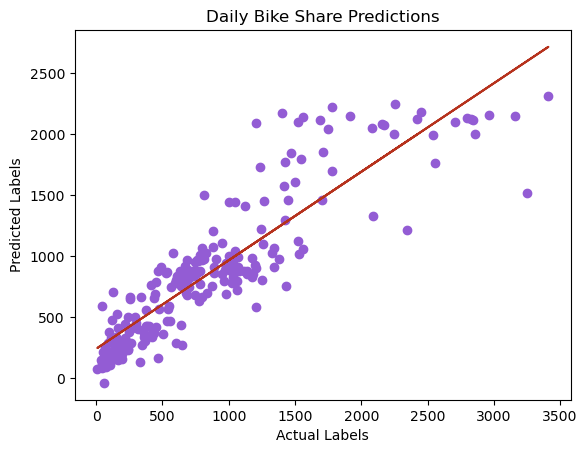

In [60]:
plt.scatter(y_test, predictions, color = "#935cd4")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = "#b6321d")
plt.show()

* Not: Gradient Boosting algoritmasında rastgele değerlerin kullanılması, her seferinde biraz farklı metriklerle sonuçlanır. Bu durumda, hiperparametre ayarıyla üretilen en iyi modelin, varsayılan hiperparametre değerleriyle eğitilmiş modelden önemli ölçüde daha iyi olması olası değildir; ancak yine de hiperparametre ayarlama tekniği hakkında bilgi sahibi olmakta fayda var!